<a href="https://colab.research.google.com/github/m4gaikwad/DPEL_Experiments/blob/main/DPEL_Exp_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bivariate Analysis

### What is Bivariate Analysis?

Bivariate analysis is a statistical method used to examine the relationship between two variables. The primary goal is to understand how one variable might influence or be related to another. It helps in identifying patterns, correlations, and potential causal relationships between pairs of variables within a dataset.

## Import Libraries

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
!wget -c https://github.com/m4gaikwad/DPEL_Experiments/raw/refs/heads/main/data/superstore_data.zip

--2026-01-06 06:10:30--  https://github.com/m4gaikwad/DPEL_Experiments/raw/refs/heads/main/data/superstore_data.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/m4gaikwad/DPEL_Experiments/refs/heads/main/data/superstore_data.zip [following]
--2026-01-06 06:10:30--  https://raw.githubusercontent.com/m4gaikwad/DPEL_Experiments/refs/heads/main/data/superstore_data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 562846 (550K) [application/zip]
Saving to: ‘superstore_data.zip’

superstore_data.zip 100%[===================>] 549.65K  --.-KB/s    in 0.03s   

2026-01-06 06:10:31 (17.3 MB/s) - ‘s

In [3]:
!unzip /content/superstore_data.zip

Archive:  /content/superstore_data.zip
  inflating: Sample - Superstore.csv  


In [5]:
data = pd.read_csv('/content/Sample - Superstore.csv',encoding_errors="ignore")

In [7]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
bivariate_data = data[['Sales','Profit']]
bivariate_data.head()

,Sales,Profit
0,261.9600,41.9136
1,731.9400,219.5820
2,14.6200,6.8714
3,957.5775,-383.0310
4,22.3680,2.5164


In [9]:
bivariate_data.isna().sum()

,0
Sales,0
Profit,0


In [19]:
bivariate_data.describe()

,Sales,Profit
count,9994.000000,9994.000000
mean,229.858001,28.656896
std,623.245101,234.260108
min,0.444000,-6599.978000
25%,17.280000,1.728750
50%,54.490000,8.666500
75%,209.940000,29.364000
max,22638.480000,8399.976000


### What is Correlation?

Correlation is a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate). It's a common tool in bivariate analysis to quantify the strength and direction of a relationship.

#### Types of Correlation:
*   **Positive Correlation**: Both variables tend to increase or decrease in the same direction. For example, as the amount of time spent studying increases, grades tend to increase.
*   **Negative Correlation**: As one variable increases, the other tends to decrease. For example, as the number of hours spent watching TV increases, test scores tend to decrease.
*   **No Correlation**: There is no consistent relationship between the two variables.

#### Correlation Coefficient:
The most common measure of correlation is the Pearson product-moment correlation coefficient (r), which ranges from -1 to +1:
*   **+1**: Indicates a perfect positive linear relationship.
*   **-1**: Indicates a perfect negative linear relationship.
*   **0**: Indicates no linear relationship. (It's important to note that a correlation of 0 does not necessarily mean no relationship at all, only no *linear* relationship.)

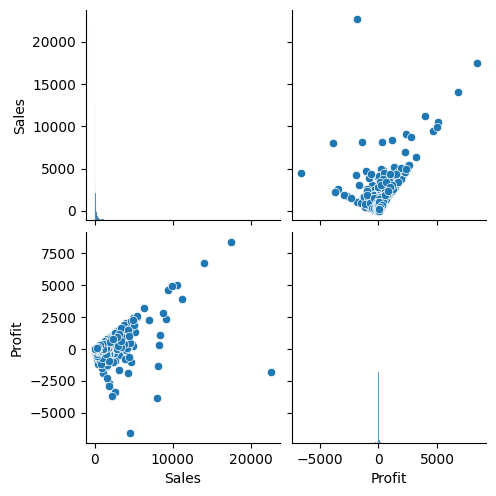

In [10]:
sns.pairplot(bivariate_data)


### Pearson Correlation Coefficient (r)

The Pearson correlation coefficient, often denoted as `r`, is the most widely used measure of the linear relationship between two continuous variables. It quantifies both the strength and direction of this linear association.

#### Key Characteristics:
*   **Range**: The value of `r` always lies between -1 and +1.
    *   `r = +1`: Indicates a perfect positive linear relationship. As one variable increases, the other increases proportionally.
    *   `r = -1`: Indicates a perfect negative linear relationship. As one variable increases, the other decreases proportionally.
    *   `r = 0`: Indicates no *linear* relationship. This does not mean there is no relationship at all, as non-linear relationships might still exist.
*   **Interpretation**: The closer `r` is to +1 or -1, the stronger the linear relationship. The closer `r` is to 0, the weaker the linear relationship.
*   **Assumptions**: For valid interpretation, Pearson correlation assumes:
    *   **Linearity**: The relationship between the variables is linear.
    *   **Continuous Data**: Both variables are measured on at least an interval scale.
    *   **Bivariate Normality**: The data for each variable is approximately normally distributed.
    *   **Homoscedasticity**: The variance of one variable is constant across all levels of the other variable.

#### When to use Pearson Correlation:
Pearson correlation is ideal when you want to measure the strength and direction of a **linear** association between two **normally distributed continuous** variables. If these assumptions are not met, other correlation measures like Spearman's or Kendall's tau might be more appropriate.

<Axes: >

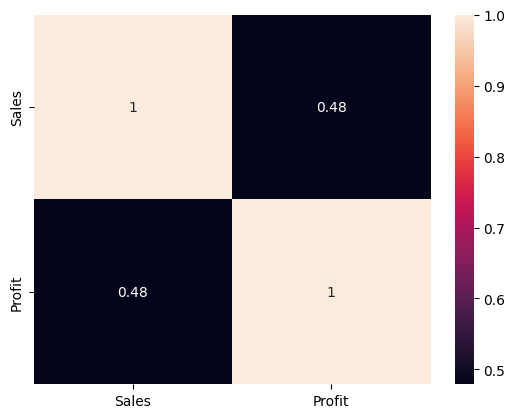

In [13]:
sns.heatmap(bivariate_data.corr("pearson"),annot=True)

### Spearman's Rank Correlation Coefficient (ρ)

Spearman's rank correlation coefficient, often denoted as `ρ` (rho) or `r_s`, is a non-parametric measure of the strength and direction of the monotonic relationship between two ranked variables. It assesses how well the relationship between two variables can be described using a monotonic function. This means that as one variable increases, the other variable either consistently increases or consistently decreases, but not necessarily at a constant rate.

#### Key Characteristics:
*   **Range**: The value of `ρ` also lies between -1 and +1.
    *   `ρ = +1`: Indicates a perfect monotonic increasing relationship.
    *   `ρ = -1`: Indicates a perfect monotonic decreasing relationship.
    *   `ρ = 0`: Indicates no monotonic relationship.
*   **Interpretation**: Similar to Pearson's `r`, the closer `ρ` is to +1 or -1, the stronger the monotonic relationship. The closer `ρ` is to 0, the weaker the monotonic relationship.
*   **Non-Parametric**: Unlike Pearson correlation, Spearman's does not assume normality or linearity of the data. Instead, it works with the ranks of the data.

#### When to use Spearman Correlation:
Spearman correlation is particularly useful when:
*   The data does not meet the assumptions for Pearson correlation (e.g., not normally distributed, relationship is not linear).
*   You have ordinal data (ranked data).
*   You are interested in the consistency of the relationship (monotonicity) rather than a strictly linear one.

It's a robust alternative to Pearson's when the assumptions of linearity and normality are violated or when dealing with outliers, as ranking reduces the impact of extreme values.

<Axes: >

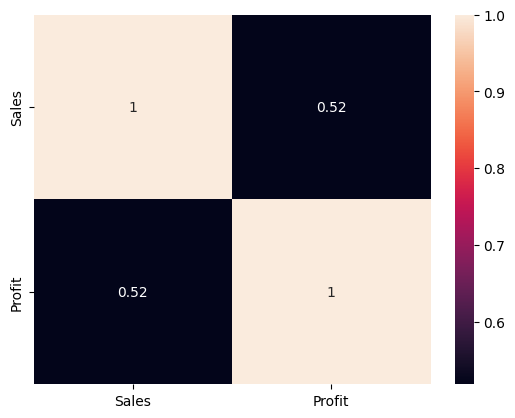

In [14]:
sns.heatmap(bivariate_data.corr("spearman"),annot=True)

### Kendall's Tau Correlation Coefficient (τ)

Kendall's Tau (τ) is another non-parametric measure of the strength and direction of association between two variables. Like Spearman's ρ, it is used for ranked data and assesses the monotonic relationship between variables. However, Kendall's Tau is based on the number of concordant and discordant pairs of observations.

#### Key Characteristics:
*   **Range**: The value of `τ` also lies between -1 and +1.
    *   `τ = +1`: Indicates a perfect concordance (monotonic increasing relationship).
    *   `τ = -1`: Indicates a perfect discordance (monotonic decreasing relationship).
    *   `τ = 0`: Indicates no monotonic relationship.
*   **Interpretation**: The closer `τ` is to +1 or -1, the stronger the monotonic relationship. The closer `τ` is to 0, the weaker the monotonic relationship. The interpretation of the strength is often considered to be more directly related to probabilities than Spearman's ρ.
*   **Non-Parametric**: It does not assume any particular distribution for the data.

#### How it's Calculated (Conceptually):
Kendall's Tau compares the number of concordant pairs (where the ranks of both variables are in the same order for two observations) with the number of discordant pairs (where the ranks are in different orders).

#### When to use Kendall's Tau:
Kendall's Tau is particularly useful in situations where:
*   You have small sample sizes.
*   There are many tied ranks (equal values) in the data.
*   You prefer a measure that is less sensitive to errors and discrepancies in data than Spearman's ρ, especially when dealing with smaller datasets or specific types of data where the underlying distribution is not well-behaved.

While both Spearman's and Kendall's measure monotonic relationships, Kendall's Tau is often considered more robust for small samples and data with many ties, and its values tend to be smaller in magnitude than Spearman's ρ for the same dataset.

<Axes: >

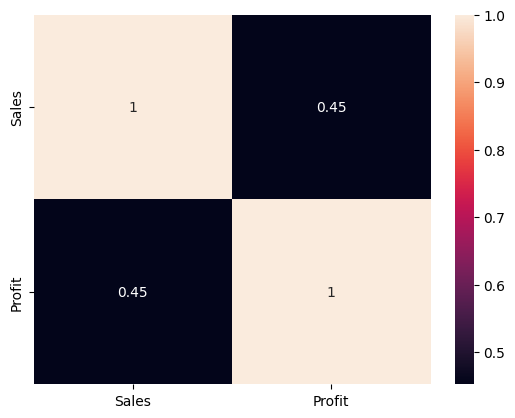

In [15]:
sns.heatmap(bivariate_data.corr("kendall"),annot=True)

<Axes: xlabel='Sales', ylabel='Count'>

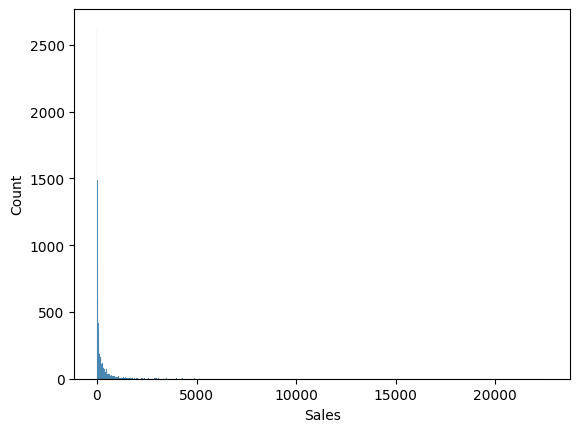

In [43]:
sns.histplot(bivariate_data['Sales'])

<Axes: xlabel='Profit', ylabel='Count'>

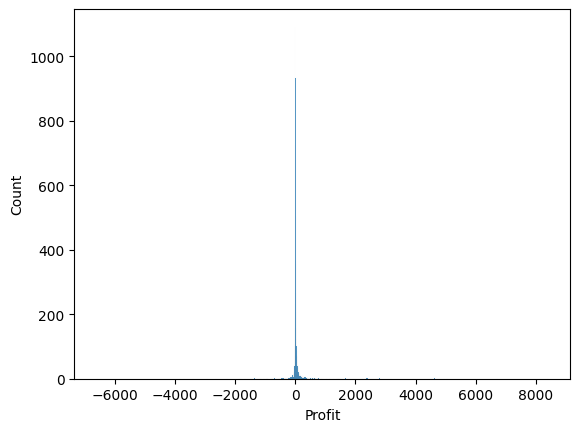

In [44]:
sns.histplot(bivariate_data['Profit'])

### Importance of Normalization (using Mean and Standard Deviation - Z-score Standardization)

Normalization, particularly using the mean and standard deviation (often referred to as Z-score standardization or Standard Scaling), is a crucial preprocessing step in many machine learning and statistical tasks. This technique transforms data so that it has a mean of 0 and a standard deviation of 1.

#### How it Works:
For each data point `x`, the normalized value `z` is calculated as:

`z = (x - μ) / σ`

Where:
*   `x` is the original feature value.
*   `μ` (mu) is the mean of the feature.
*   `σ` (sigma) is the standard deviation of the feature.

#### Why it's Important:
1.  **Equal Contribution of Features**: Features often have different scales and ranges. Without normalization, features with larger values (or wider ranges) might dominate the learning process, leading to models that are biased towards these features. Normalization ensures that all features contribute equally to the distance calculations or gradient descent.

2.  **Improved Algorithm Performance**: Many machine learning algorithms, especially those that rely on distance calculations or gradient descent optimization, perform better and converge faster when features are normalized. Examples include:
    *   **K-Nearest Neighbors (KNN)**: Distances between points are heavily influenced by features with larger scales.
    *   **Support Vector Machines (SVM)**: Maximize the margin, which can be distorted by unscaled features.
    *   **Principal Component Analysis (PCA)**: Components can be heavily biased towards features with high variance.
    *   **Neural Networks**: Normalizing input features often leads to faster convergence and prevents issues like exploding or vanishing gradients.

3.  **Prevents Numerical Instability**: Large differences in feature scales can lead to numerical instability in calculations, especially in optimization algorithms, making the learning process difficult or inefficient.

4.  **Comparability Across Features**: Normalized features become unit-less, allowing for a more meaningful comparison of their relative importance or impact on the model.

#### When to Use:
Z-score standardization is generally suitable when your data follows a Gaussian (normal) distribution or when you want to handle outliers in a way that minimizes their impact on the mean and standard deviation. It's a common and effective choice for a wide range of machine learning models.

In [39]:
norm_data = pd.DataFrame()
norm_data['Sales'] = (bivariate_data['Sales'] - bivariate_data['Sales'].mean()) / bivariate_data['Sales'].std()
norm_data['Profit'] = (bivariate_data['Profit'] - bivariate_data['Profit'].mean()) / bivariate_data['Profit'].std()

In [40]:
norm_data.head()

,Sales,Profit
0,0.051508,0.056590
1,0.805593,0.815013
2,-0.345350,-0.092997
3,1.167630,-1.757397
4,-0.332919,-0.111587


In [41]:
X_train, X_test, y_train, y_test = train_test_split(norm_data.drop('Profit', axis=1), norm_data['Profit'], test_size=0.2, random_state=42)

In [50]:
prediction = LinearRegression().fit(X_train, y_train).predict(X_test)
mse = mean_squared_error(y_test, prediction)
mae = mean_absolute_error(y_test, prediction)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 1.5860481171717478
Mean Absolute Error: 0.30265856100917166


In [65]:
predict = RandomForestRegressor(n_estimators=150,max_depth=30, criterion="absolute_error",n_jobs=-1).fit(X_train, y_train).predict(X_test)
rf_mse = mean_squared_error(y_test, predict)
rf_mae = mean_absolute_error(y_test,predict)
print("Mean Squared Error:", rf_mse)
print("Mean Absolute Error:", rf_mae)

Mean Squared Error: 1.7894051409163556
Mean Absolute Error: 0.24829447016103298
